In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drawndata1.csv")

In [3]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [4]:
X = df[['x', 'y']].values
y = df['z']=="a"

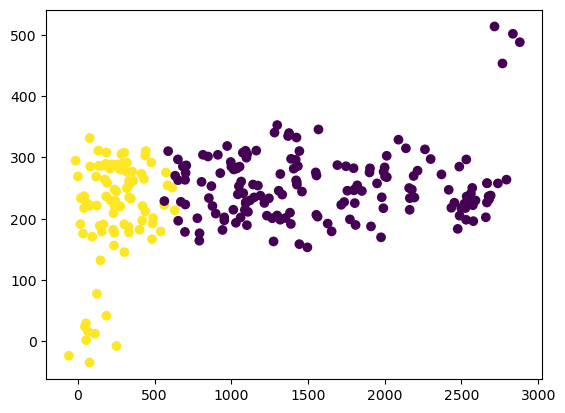

In [5]:
plt.scatter(X[:,0],X[:,1], c=y);

In [6]:
#here in above scatter plot we see two types of group of data points and we can
#also notice that we see the small group of outliers from both the group of 
#data points which are at the top and both a small group of outliers and 
#another thing we should be aware of is that the y-axis over here is on a 
#completely scale as the x-axis over here and it can be sometimes bothersome
#the effect that these axes will have depends on your algorithm but in general
#you can imagine that algorithms are sensitive for this kind of things.So a 
#large chunk of pre-processing in this case is going to revolve around scaling 
#we have to rescale this data such that there's still info in there but it's 
#just numerically bit more stable because the x and y axis are just a little
#bit more in line with eachother and as you might be able to guess from the name
#a standard way of doing this is using the standardScaler from scikit-learn.
#and what it does is for each column it is going to calculate the mean as well 
#as the variance the idea here being that if you have a data point x and you
#subtract the mean of x from it and then you divide by the square root of the 
#variance well then you're going to have something that revolves around zero
#So what we're gonna do is we will use standardScalar to rescale the dataset 
#that you see here .

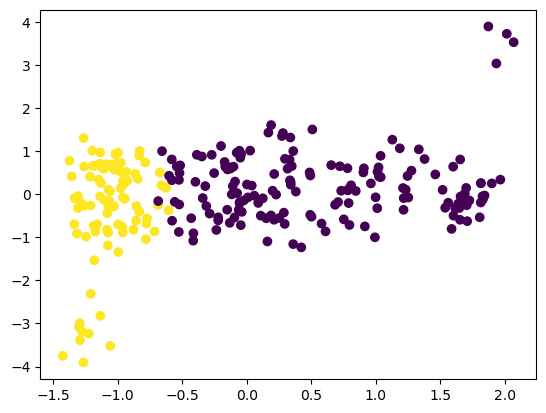

In [7]:
from sklearn.preprocessing import StandardScaler 
X_new=StandardScaler().fit_transform(X)#creating scaler obj
plt.scatter(X_new[:,0],X_new[:,1], c=y);

In [8]:
#now what you see is these x-axis and y-axis are numerically much more similar
#than previous scatter plot but it's not exactly perfect.In y-axis it has 8 units
#x-axis it has more like 3 and half and we can observe that nothing is really 
#happening with these outliers.So the standard scaler is doing things we like 
#but it does make you wonder is maybe another way of scaling this 

C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (252). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


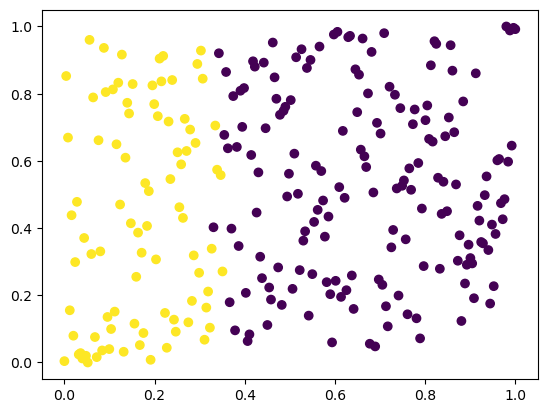

In [9]:
from sklearn.preprocessing import StandardScaler,QuantileTransformer
X_new=QuantileTransformer().fit_transform(X)#creating scaler obj
plt.scatter(X_new[:,0],X_new[:,1], c=y);

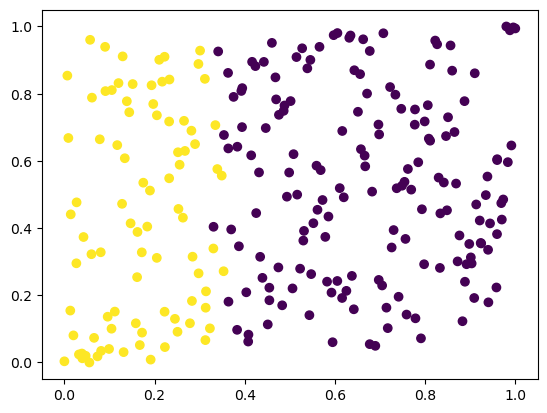

In [10]:
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 
X_new=QuantileTransformer(n_quantiles=100).fit_transform(X)#creating scaler obj
plt.scatter(X_new[:,0],X_new[:,1], c=y);

In [11]:
#if we notice in above scatter plot that the minimum as well as the maximum on
#both axes are exactly equal and we can also see the outliers in the data it's 
#it's just that they have less of a profound effect and the reason for that 
#is because now we're using quantiles to transform and scale as opposed to using 
#mean and standard deviation.This quantile transformers are much less influenced
#by the outliers.

In [12]:
#function to deal with the plotting
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

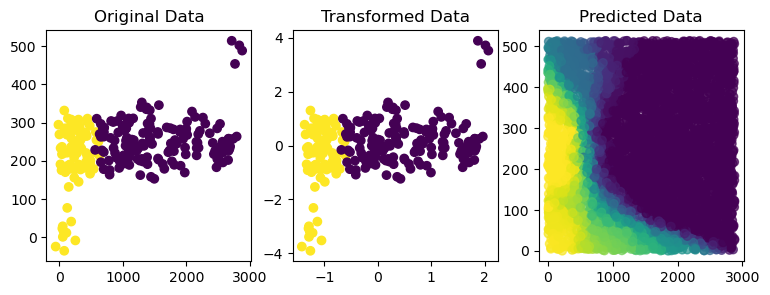

In [13]:
#Effect of standardScaller
plot_output(scaler=StandardScaler())

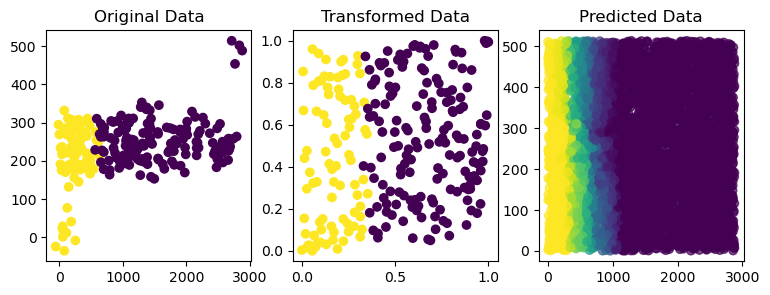

In [14]:
#Effect of QuantileTransformer
plot_output(scaler=QuantileTransformer(n_quantiles=100))
#here we can easily classify using quantiletransformer

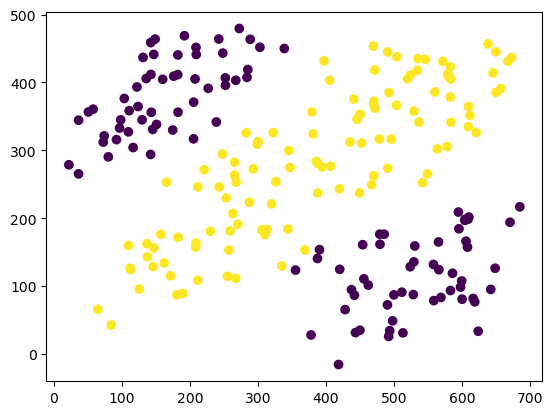

In [15]:
df = pd.read_csv("drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y);

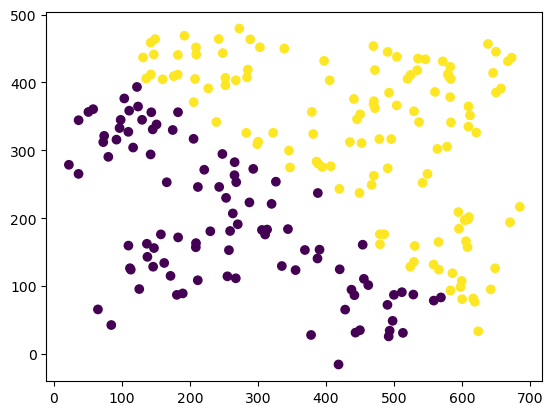

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=100)),
    ("model", LogisticRegression())
])

pred = pipe.fit(X,y).predict(X)
plt.scatter(X[:,0],X[:,1], c=pred);

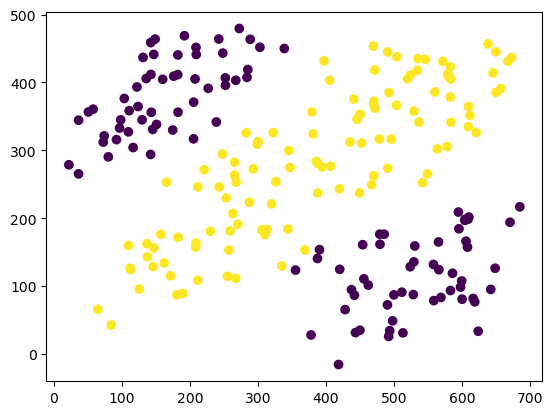

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X,y).predict(X)
plt.scatter(X[:,0],X[:,1], c=pred);

# One hot encoding

In [18]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr#we can transform this text data into numeric form using OneHotEncoder(preprocessing)
#if this is the class you want to predict then after preprocessing the o/p which
#you get will be 'y' and the class you want to predict will be 'X'.

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [21]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [22]:
enc.transform([["zero"]])

array([[0., 0., 0.]])